# Data Cleaning

## 1. Handling Missing Data

#### Finding out missing values

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# dataset = pd.read_csv(r".\\titanic.csv") # r means raw string and . means current location
# If the csv file is in the same directory as our program we can get it directly
dataset = pd.read_csv("../assets/csv-files/students.csv")
dataset.head(3)

,Roll No,Name,Gender,Age,Faculty,Level,Program,Year,Year of Study,GPA,Enrollment Status,Phone Number,Email
0,100000,Student0,F,24.0,Law,Graduate,LLB,2024.0,4.0,3.10,Online,977-9889833788,student100000@university.edu
1,100001,Student1,M,25.0,Management,Graduate,NaN,2022.0,4.0,2.77,Physical,977-9823190889,student100001@university.edu
2,100002,Student2,F,29.0,Engineering,Phd,Electrical,2022.0,2.0,2.67,NaN,977-9826760704,student100002@university.edu


In [3]:
dataset.shape # Displays (rows, coluns)

(500, 13)

In [4]:
dataset.shape[0] # Displays number of rows, 1 for columns

500

In [5]:
dataset.isnull() # Represents True if null value otherwise False in dataset

,Roll No,Name,Gender,Age,Faculty,Level,Program,Year,Year of Study,GPA,Enrollment Status,Phone Number,Email
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,True,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,True
4,False,False,False,True,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,False,False,False,False,True,True,True,False,True,False,False,False,True
496,False,False,False,False,False,False,True,False,False,False,False,False,False
497,False,False,False,False,False,False,False,False,False,True,False,False,False
498,False,False,False,False,True,True,True,False,True,False,False,False,False


In [6]:
dataset.isnull().sum() # Provides total number of null values in each column

Roll No                0
Name                   0
Gender                40
Age                   41
Faculty               54
Level                105
Program               99
Year                  51
Year of Study        105
GPA                   54
Enrollment Status     59
Phone Number          56
Email                 55
dtype: int64

In [7]:
dataset.isnull().sum().sum() # Provides total number of null values in dataset

np.int64(719)

In [8]:
# Simillarly notnull() can be used for non-null values
dataset.notnull().sum().sum()

np.int64(5781)

In [9]:
# To get total null values in each column in percentage we have to calculate it
(dataset.isnull().sum() / dataset.shape[0]) * 100

Roll No               0.0
Name                  0.0
Gender                8.0
Age                   8.2
Faculty              10.8
Level                21.0
Program              19.8
Year                 10.2
Year of Study        21.0
GPA                  10.8
Enrollment Status    11.8
Phone Number         11.2
Email                11.0
dtype: float64

In [10]:
# To get total null values in percentage we have to calculate it
(dataset.isnull().sum().sum() / (dataset.shape[0] * dataset.shape[1])) * 100

np.float64(11.061538461538461)

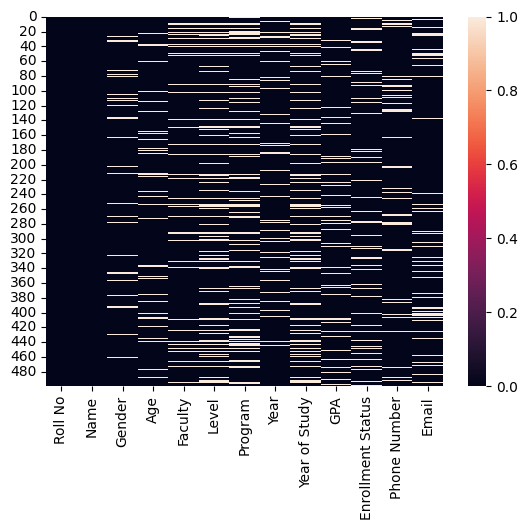

In [11]:
# For making a graphical representation
sns.heatmap(dataset.isnull())
plt.show()

#### Dropping missing values

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [13]:
dataset = pd.read_csv("../assets/csv-files/students.csv")
dataset.head(4)

,Roll No,Name,Gender,Age,Faculty,Level,Program,Year,Year of Study,GPA,Enrollment Status,Phone Number,Email
0,100000,Student0,F,24.0,Law,Graduate,LLB,2024.0,4.0,3.10,Online,977-9889833788,student100000@university.edu
1,100001,Student1,M,25.0,Management,Graduate,NaN,2022.0,4.0,2.77,Physical,977-9823190889,student100001@university.edu
2,100002,Student2,F,29.0,Engineering,Phd,Electrical,2022.0,2.0,2.67,NaN,977-9826760704,student100002@university.edu
3,100003,Student3,F,53.0,Education,Phd,Nepali,2023.0,2.0,3.47,Physical,977-9858318769,NaN


In [14]:
dataset.shape # Provides total number of rows and columns

(500, 13)

In [15]:
dataset.isnull().sum() # Provides total number of null values in each column

Roll No                0
Name                   0
Gender                40
Age                   41
Faculty               54
Level                105
Program               99
Year                  51
Year of Study        105
GPA                   54
Enrollment Status     59
Phone Number          56
Email                 55
dtype: int64

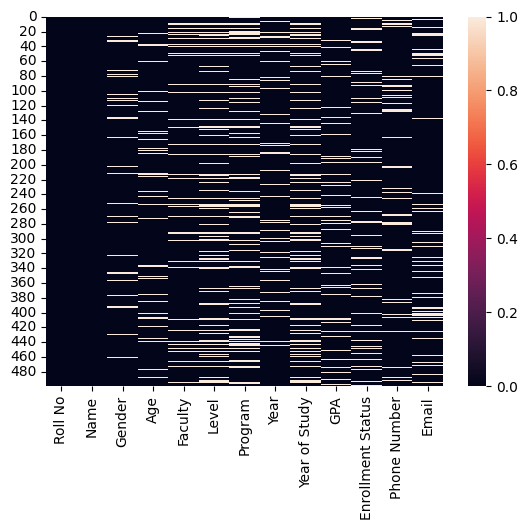

In [16]:
# Lets plot the graphical visual
sns.heatmap(dataset.isnull())
plt.show()

In [17]:
# Droping a column with maxximum null values
dataset.drop(columns=["Gender"], inplace=True)

In [18]:
#Droping all the rows with null values
dataset.dropna(inplace=True)

In [19]:
dataset.shape # Provides remaining rows and columns

(177, 12)

In [20]:
dataset.isnull().sum().sum() # It must be zero

np.int64(0)

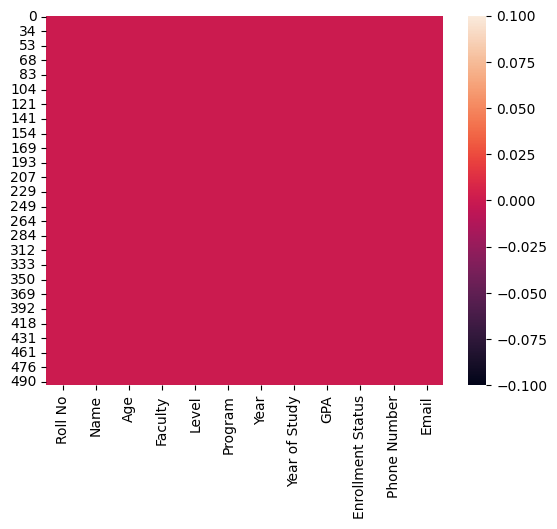

In [21]:
# Lets plot a graph
sns.heatmap(dataset.isnull())
plt.show()

#### Imputing category data

In [22]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [23]:
dataset = pd.read_csv("../assets/csv-files/students.csv")
dataset.head(5)

,Roll No,Name,Gender,Age,Faculty,Level,Program,Year,Year of Study,GPA,Enrollment Status,Phone Number,Email
0,100000,Student0,F,24.0,Law,Graduate,LLB,2024.0,4.0,3.10,Online,977-9889833788,student100000@university.edu
1,100001,Student1,M,25.0,Management,Graduate,NaN,2022.0,4.0,2.77,Physical,977-9823190889,student100001@university.edu
2,100002,Student2,F,29.0,Engineering,Phd,Electrical,2022.0,2.0,2.67,NaN,977-9826760704,student100002@university.edu
3,100003,Student3,F,53.0,Education,Phd,Nepali,2023.0,2.0,3.47,Physical,977-9858318769,NaN
4,100004,Student4,M,NaN,Engineering,Phd,Electrical,2024.0,2.0,3.11,Online,977-9850103564,student100004@university.edu


In [24]:
dataset.isnull().sum()

Roll No                0
Name                   0
Gender                40
Age                   41
Faculty               54
Level                105
Program               99
Year                  51
Year of Study        105
GPA                   54
Enrollment Status     59
Phone Number          56
Email                 55
dtype: int64

In [25]:
dataset.fillna(5) # Fills all the missing values with 5
# Remember that we have many types of data with different datatypes so, filling same thing to all is not a convinent way
# Category data can be filled by using mode, backward filling or forward filling

,Roll No,Name,Gender,Age,Faculty,Level,Program,Year,Year of Study,GPA,Enrollment Status,Phone Number,Email
0,100000,Student0,F,24.0,Law,Graduate,LLB,2024.0,4.0,3.10,Online,977-9889833788,student100000@university.edu
1,100001,Student1,M,25.0,Management,Graduate,5,2022.0,4.0,2.77,Physical,977-9823190889,student100001@university.edu
2,100002,Student2,F,29.0,Engineering,Phd,Electrical,2022.0,2.0,2.67,5,977-9826760704,student100002@university.edu
3,100003,Student3,F,53.0,Education,Phd,Nepali,2023.0,2.0,3.47,Physical,977-9858318769,5
4,100004,Student4,M,5.0,Engineering,Phd,Electrical,2024.0,2.0,3.11,Online,977-9850103564,student100004@university.edu
...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,100495,Student495,M,47.0,5,5,5,2024.0,5.0,3.28,Physical,977-9804020202,5
496,100496,Student496,F,51.0,Management,Phd,5,2020.0,2.0,3.49,Online,977-9858513630,student100496@university.edu
497,100497,Student497,F,27.0,Engineering,Phd,Electronic and Communication,2023.0,2.0,5.00,Physical,977-9817818164,student100497@university.edu
498,100498,Student498,F,29.0,5,5,5,2022.0,5.0,3.20,Online,977-9891195410,student100498@university.edu


In [26]:
dataset.info() # Shows information related to dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Roll No            500 non-null    int64  
 1   Name               500 non-null    object 
 2   Gender             460 non-null    object 
 3   Age                459 non-null    float64
 4   Faculty            446 non-null    object 
 5   Level              395 non-null    object 
 6   Program            401 non-null    object 
 7   Year               449 non-null    float64
 8   Year of Study      395 non-null    float64
 9   GPA                446 non-null    float64
 10  Enrollment Status  441 non-null    object 
 11  Phone Number       444 non-null    object 
 12  Email              445 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 50.9+ KB


In [27]:
dataset.fillna(method="bfill") # Backward filling
# You can also choose axis whild filling, axis=0 is default

C:\Users\kusha\AppData\Local\Temp\ipykernel_18908\939976979.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  dataset.fillna(method="bfill") # Backward filling


,Roll No,Name,Gender,Age,Faculty,Level,Program,Year,Year of Study,GPA,Enrollment Status,Phone Number,Email
0,100000,Student0,F,24.0,Law,Graduate,LLB,2024.0,4.0,3.10,Online,977-9889833788,student100000@university.edu
1,100001,Student1,M,25.0,Management,Graduate,Electrical,2022.0,4.0,2.77,Physical,977-9823190889,student100001@university.edu
2,100002,Student2,F,29.0,Engineering,Phd,Electrical,2022.0,2.0,2.67,Physical,977-9826760704,student100002@university.edu
3,100003,Student3,F,53.0,Education,Phd,Nepali,2023.0,2.0,3.47,Physical,977-9858318769,student100004@university.edu
4,100004,Student4,M,20.0,Engineering,Phd,Electrical,2024.0,2.0,3.11,Online,977-9850103564,student100004@university.edu
...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,100495,Student495,M,47.0,Management,Phd,Electronic and Communication,2024.0,2.0,3.28,Physical,977-9804020202,student100496@university.edu
496,100496,Student496,F,51.0,Management,Phd,Electronic and Communication,2020.0,2.0,3.49,Online,977-9858513630,student100496@university.edu
497,100497,Student497,F,27.0,Engineering,Phd,Electronic and Communication,2023.0,2.0,3.20,Physical,977-9817818164,student100497@university.edu
498,100498,Student498,F,29.0,Engineering,Phd,Architecture,2022.0,2.0,3.20,Online,977-9891195410,student100498@university.edu


In [28]:
dataset.fillna(method="ffill") # Forward filling

C:\Users\kusha\AppData\Local\Temp\ipykernel_18908\2440255086.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  dataset.fillna(method="ffill") # Forward filling


,Roll No,Name,Gender,Age,Faculty,Level,Program,Year,Year of Study,GPA,Enrollment Status,Phone Number,Email
0,100000,Student0,F,24.0,Law,Graduate,LLB,2024.0,4.0,3.10,Online,977-9889833788,student100000@university.edu
1,100001,Student1,M,25.0,Management,Graduate,LLB,2022.0,4.0,2.77,Physical,977-9823190889,student100001@university.edu
2,100002,Student2,F,29.0,Engineering,Phd,Electrical,2022.0,2.0,2.67,Physical,977-9826760704,student100002@university.edu
3,100003,Student3,F,53.0,Education,Phd,Nepali,2023.0,2.0,3.47,Physical,977-9858318769,student100002@university.edu
4,100004,Student4,M,53.0,Engineering,Phd,Electrical,2024.0,2.0,3.11,Online,977-9850103564,student100004@university.edu
...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,100495,Student495,M,47.0,Management,Phd,BBA,2024.0,2.0,3.28,Physical,977-9804020202,student100494@university.edu
496,100496,Student496,F,51.0,Management,Phd,BBA,2020.0,2.0,3.49,Online,977-9858513630,student100496@university.edu
497,100497,Student497,F,27.0,Engineering,Phd,Electronic and Communication,2023.0,2.0,3.49,Physical,977-9817818164,student100497@university.edu
498,100498,Student498,F,29.0,Engineering,Phd,Electronic and Communication,2022.0,2.0,3.20,Online,977-9891195410,student100498@university.edu


In [29]:
# Filling mode in a particular column
dataset["Age"].fillna(dataset["Age"].mode()[0])

0      24.0
1      25.0
2      29.0
3      53.0
4      25.0
       ... 
495    47.0
496    51.0
497    27.0
498    29.0
499    38.0
Name: Age, Length: 500, dtype: float64

In [30]:
# Filling mode in all columns having categorical data
for i in dataset.select_dtypes(include="object").columns:
    dataset[i].fillna(dataset[i].mode()[0])
# Use inplace=True if you want a permanent change

In [31]:
for i in dataset.select_dtypes(include="object").columns:
    dataset[i].fillna(dataset[i].mode()[0], inplace=True)

C:\Users\kusha\AppData\Local\Temp\ipykernel_18908\3862753010.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset[i].fillna(dataset[i].mode()[0], inplace=True)


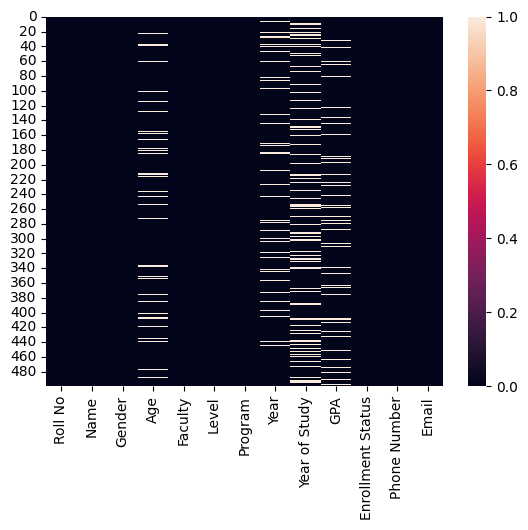

"The null values still showing are the numerical data which haven't been removed yet"

In [32]:
# Lets plot a graph
sns.heatmap(dataset.isnull())
plt.show()

'''The null values still showing are the numerical data which haven't been removed yet'''

####  Imputing missing values using scikit-learn

In [33]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [34]:
dataset = pd.read_csv("../assets/csv-files/students.csv")
dataset.head(5)

,Roll No,Name,Gender,Age,Faculty,Level,Program,Year,Year of Study,GPA,Enrollment Status,Phone Number,Email
0,100000,Student0,F,24.0,Law,Graduate,LLB,2024.0,4.0,3.10,Online,977-9889833788,student100000@university.edu
1,100001,Student1,M,25.0,Management,Graduate,NaN,2022.0,4.0,2.77,Physical,977-9823190889,student100001@university.edu
2,100002,Student2,F,29.0,Engineering,Phd,Electrical,2022.0,2.0,2.67,NaN,977-9826760704,student100002@university.edu
3,100003,Student3,F,53.0,Education,Phd,Nepali,2023.0,2.0,3.47,Physical,977-9858318769,NaN
4,100004,Student4,M,NaN,Engineering,Phd,Electrical,2024.0,2.0,3.11,Online,977-9850103564,student100004@university.edu


In [35]:
dataset.isnull().sum()

Roll No                0
Name                   0
Gender                40
Age                   41
Faculty               54
Level                105
Program               99
Year                  51
Year of Study        105
GPA                   54
Enrollment Status     59
Phone Number          56
Email                 55
dtype: int64

In [36]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Roll No            500 non-null    int64  
 1   Name               500 non-null    object 
 2   Gender             460 non-null    object 
 3   Age                459 non-null    float64
 4   Faculty            446 non-null    object 
 5   Level              395 non-null    object 
 6   Program            401 non-null    object 
 7   Year               449 non-null    float64
 8   Year of Study      395 non-null    float64
 9   GPA                446 non-null    float64
 10  Enrollment Status  441 non-null    object 
 11  Phone Number       444 non-null    object 
 12  Email              445 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 50.9+ KB


In [37]:
dataset.select_dtypes(include="float64").columns # Return all the columns having float64 datatype

Index(['Age', 'Year', 'Year of Study', 'GPA'], dtype='object')

In [38]:
columns = dataset.select_dtypes(include="float64").columns # Store the columns in the variable as list

In [39]:
# Now imputing missing values using scikit-learn
from sklearn.impute import SimpleImputer

In [40]:
si = SimpleImputer(strategy="mean") # Create an object of  class SimpleImputer
si.fit_transform(dataset[columns]) # This will return the selected columns as in the form of array after filling null values

array([[2.40000000e+01, 2.02400000e+03, 4.00000000e+00, 3.10000000e+00],
       [2.50000000e+01, 2.02200000e+03, 4.00000000e+00, 2.77000000e+00],
       [2.90000000e+01, 2.02200000e+03, 2.00000000e+00, 2.67000000e+00],
       ...,
       [2.70000000e+01, 2.02300000e+03, 2.00000000e+00, 2.98161435e+00],
       [2.90000000e+01, 2.02200000e+03, 2.92405063e+00, 3.20000000e+00],
       [3.80000000e+01, 2.02300000e+03, 2.00000000e+00, 3.68000000e+00]],
      shape=(500, 4))

In [41]:
array = si.fit_transform(dataset[columns])
new_dataset = pd.DataFrame(array, columns=columns) # Transforming array to dataset
new_dataset

,Age,Year,Year of Study,GPA
0,24.000000,2024.0,4.000000,3.100000
1,25.000000,2022.0,4.000000,2.770000
2,29.000000,2022.0,2.000000,2.670000
3,53.000000,2023.0,2.000000,3.470000
4,33.248366,2024.0,2.000000,3.110000
...,...,...,...,...
495,47.000000,2024.0,2.924051,3.280000
496,51.000000,2020.0,2.000000,3.490000
497,27.000000,2023.0,2.000000,2.981614
498,29.000000,2022.0,2.924051,3.200000


In [42]:
new_dataset.isnull().sum() # No null values are present now
# All null values have been filled by means

Age              0
Year             0
Year of Study    0
GPA              0
dtype: int64

## 2. Outlier Detection and Handling

#### Outlier Detection

In [43]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [44]:
dataset = pd.read_csv("../assets/csv-files/students.csv")
dataset.head()

,Roll No,Name,Gender,Age,Faculty,Level,Program,Year,Year of Study,GPA,Enrollment Status,Phone Number,Email
0,100000,Student0,F,24.0,Law,Graduate,LLB,2024.0,4.0,3.10,Online,977-9889833788,student100000@university.edu
1,100001,Student1,M,25.0,Management,Graduate,NaN,2022.0,4.0,2.77,Physical,977-9823190889,student100001@university.edu
2,100002,Student2,F,29.0,Engineering,Phd,Electrical,2022.0,2.0,2.67,NaN,977-9826760704,student100002@university.edu
3,100003,Student3,F,53.0,Education,Phd,Nepali,2023.0,2.0,3.47,Physical,977-9858318769,NaN
4,100004,Student4,M,NaN,Engineering,Phd,Electrical,2024.0,2.0,3.11,Online,977-9850103564,student100004@university.edu


In [45]:
dataset.info() #Provides info about dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Roll No            500 non-null    int64  
 1   Name               500 non-null    object 
 2   Gender             460 non-null    object 
 3   Age                459 non-null    float64
 4   Faculty            446 non-null    object 
 5   Level              395 non-null    object 
 6   Program            401 non-null    object 
 7   Year               449 non-null    float64
 8   Year of Study      395 non-null    float64
 9   GPA                446 non-null    float64
 10  Enrollment Status  441 non-null    object 
 11  Phone Number       444 non-null    object 
 12  Email              445 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 50.9+ KB


In [46]:
dataset.describe() # Describe dataset statistics

,Roll No,Age,Year,Year of Study,GPA
count,500.000000,459.000000,449.000000,395.000000,446.000000
mean,100249.500000,33.248366,2022.051225,2.924051,2.981614
std,144.481833,11.073562,1.402980,0.827389,0.548920
min,100000.000000,19.000000,2020.000000,2.000000,2.000000
25%,100124.750000,25.000000,2021.000000,2.000000,2.530000
50%,100249.500000,30.000000,2022.000000,3.000000,2.970000
75%,100374.250000,40.000000,2023.000000,4.000000,3.440000
max,100499.000000,59.000000,2024.000000,4.000000,3.980000


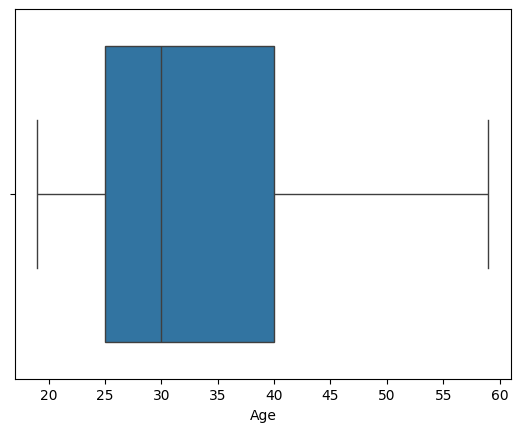

In [47]:
# Visual using boxplot
sns.boxplot(x="Age", data=dataset)
plt.show()

In [48]:
# We find no outliers in the data
# So lets create some outliers in Age column by ourself for analysis by filling null values
import random
dataset["Age"].fillna(random.choice([i for i in range(0, 5)] + [i for i in range(80, 95)]), inplace=True)

C:\Users\kusha\AppData\Local\Temp\ipykernel_18908\380235923.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset["Age"].fillna(random.choice([i for i in range(0, 5)] + [i for i in range(80, 95)]), inplace=True)


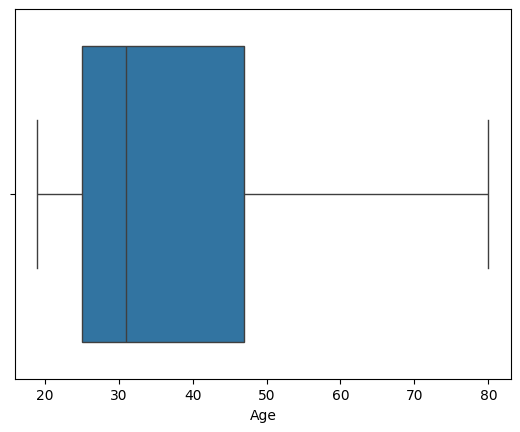

In [49]:
sns.boxplot(x="Age", data=dataset)
plt.show()
# Now we can see outliers clearly in the boxplot

#### Outlier Handling

Outlier Removal by Using Direct Method

In [50]:
min_range = dataset["Age"].mean() - (3 * dataset["Age"].std()) # min_range = mean - 3 std
max_range = dataset["Age"].mean() + (3 * dataset["Age"].std()) # max_range = mean + 3 std
min_range, max_range

(np.float64(-12.88489769969177), np.float64(87.04889769969176))

In [51]:
# Create a new dataset by removing outliers
new_dataset = dataset[(dataset["Age"] <= max_range) & (dataset["Age"] >= min_range)] 
new_dataset.head(3)

,Roll No,Name,Gender,Age,Faculty,Level,Program,Year,Year of Study,GPA,Enrollment Status,Phone Number,Email
0,100000,Student0,F,24.0,Law,Graduate,LLB,2024.0,4.0,3.10,Online,977-9889833788,student100000@university.edu
1,100001,Student1,M,25.0,Management,Graduate,NaN,2022.0,4.0,2.77,Physical,977-9823190889,student100001@university.edu
2,100002,Student2,F,29.0,Engineering,Phd,Electrical,2022.0,2.0,2.67,NaN,977-9826760704,student100002@university.edu


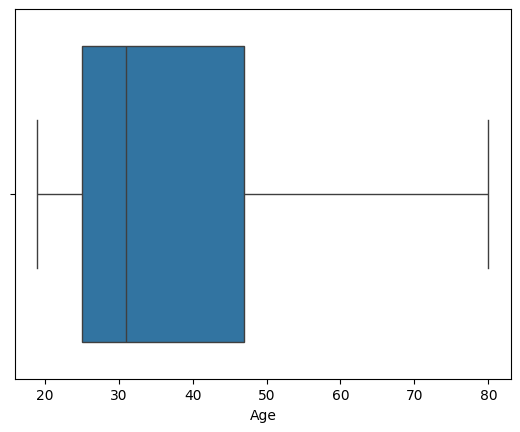

'If some outliers are still remaining, avoid them because it can lead to huge data losses'

In [52]:
sns.boxplot(x="Age", data=new_dataset)
plt.show()

'''If some outliers are still remaining, avoid them because it can lead to huge data losses'''

Outlier Removal Using IQR

In [53]:
q1 = dataset["Age"].quantile(0.25) # First quantile
q3 = dataset["Age"].quantile(0.75) # Third quantile
q1, q3

(np.float64(25.0), np.float64(47.0))

In [54]:
iqr = q3 - q1 # Calculate IQR
iqr

np.float64(22.0)

In [55]:
# Find range
min_range = q1 - (1.5 * iqr)
max_range = q3 + (1.5 * iqr)
min_range, max_range

(np.float64(-8.0), np.float64(80.0))

In [56]:
# Remove the outliers
new_dataset = dataset[(dataset["Age"] < max_range) & (dataset["Age"] > min_range)]

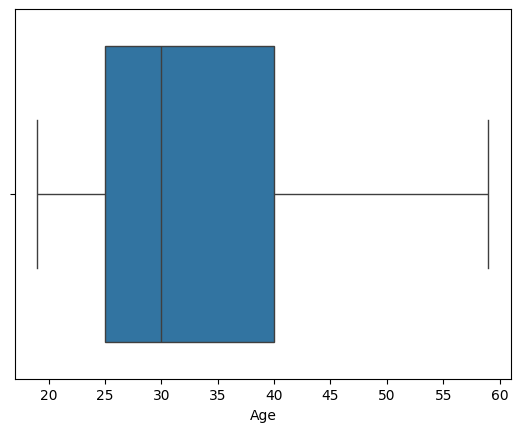

'If some outliers are still remaining, avoid them because removing can lead to huge data losses'

In [57]:
sns.boxplot(x="Age", data=new_dataset)
plt.show()

'''If some outliers are still remaining, avoid them because removing can lead to huge data losses'''

Outlier Removal by Using Z Score
- The Z score method has same functionality as direct method

In [58]:
# Calculate z-score
z_score = (dataset["Age"] - dataset["Age"].mean()) / dataset["Age"].std() 
z_score

0     -0.785440
1     -0.725400
2     -0.485241
3      0.955713
4      2.576786
         ...   
495    0.595474
496    0.835633
497   -0.605321
498   -0.485241
499    0.055116
Name: Age, Length: 500, dtype: float64

In [59]:
dataset["Z Score"] = z_score # Adding a column to dataset

In [60]:
new_dataset = dataset[(dataset["Z Score"] < 3) & (dataset["Z Score"] > -3)] # Removes Outliner
new_dataset.head(4)

,Roll No,Name,Gender,Age,Faculty,Level,Program,Year,Year of Study,GPA,Enrollment Status,Phone Number,Email,Z Score
0,100000,Student0,F,24.0,Law,Graduate,LLB,2024.0,4.0,3.10,Online,977-9889833788,student100000@university.edu,-0.785440
1,100001,Student1,M,25.0,Management,Graduate,NaN,2022.0,4.0,2.77,Physical,977-9823190889,student100001@university.edu,-0.725400
2,100002,Student2,F,29.0,Engineering,Phd,Electrical,2022.0,2.0,2.67,NaN,977-9826760704,student100002@university.edu,-0.485241
3,100003,Student3,F,53.0,Education,Phd,Nepali,2023.0,2.0,3.47,Physical,977-9858318769,NaN,0.955713


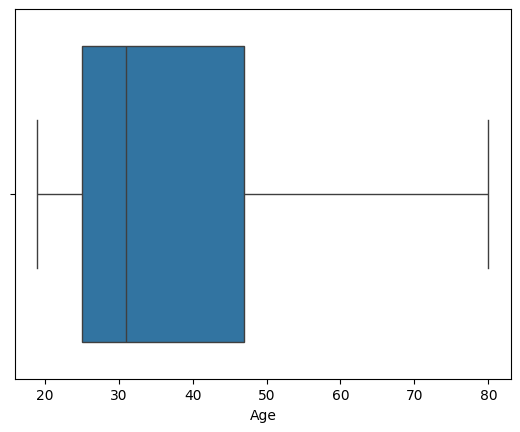

In [61]:
sns.boxplot(x="Age", data=new_dataset)
plt.show()

## 3. Data Scaling And Transformation

#### Feature Scaling (Standardization)

In [62]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [63]:
dataset = pd.read_csv("../assets/csv-files/students.csv")
dataset.head(3)

,Roll No,Name,Gender,Age,Faculty,Level,Program,Year,Year of Study,GPA,Enrollment Status,Phone Number,Email
0,100000,Student0,F,24.0,Law,Graduate,LLB,2024.0,4.0,3.10,Online,977-9889833788,student100000@university.edu
1,100001,Student1,M,25.0,Management,Graduate,NaN,2022.0,4.0,2.77,Physical,977-9823190889,student100001@university.edu
2,100002,Student2,F,29.0,Engineering,Phd,Electrical,2022.0,2.0,2.67,NaN,977-9826760704,student100002@university.edu


In [64]:
dataset.isnull().sum()

Roll No                0
Name                   0
Gender                40
Age                   41
Faculty               54
Level                105
Program               99
Year                  51
Year of Study        105
GPA                   54
Enrollment Status     59
Phone Number          56
Email                 55
dtype: int64

In [65]:
dataset["Age"].fillna(dataset["Age"].mean(), inplace=True) # Fill null values

C:\Users\kusha\AppData\Local\Temp\ipykernel_18908\651890484.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset["Age"].fillna(dataset["Age"].mean(), inplace=True) # Fill null values


C:\Users\kusha\AppData\Local\Temp\ipykernel_18908\3259701514.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset["Age"])


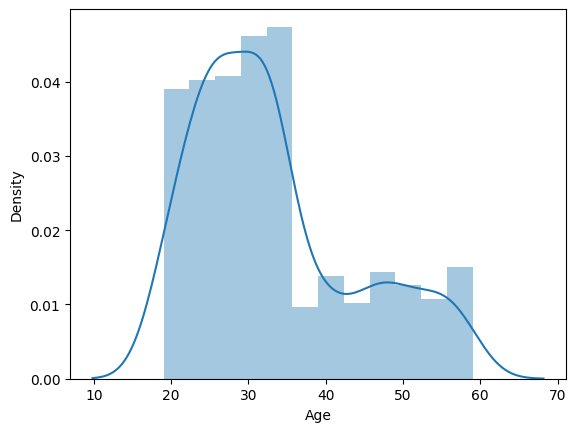

In [66]:
# Visualization
sns.distplot(dataset["Age"])
plt.show()

In [67]:
dataset.describe() # Describe statics of dataset

,Roll No,Age,Year,Year of Study,GPA
count,500.000000,500.000000,449.000000,395.000000,446.000000
mean,100249.500000,33.248366,2022.051225,2.924051,2.981614
std,144.481833,10.608886,1.402980,0.827389,0.548920
min,100000.000000,19.000000,2020.000000,2.000000,2.000000
25%,100124.750000,25.000000,2021.000000,2.000000,2.530000
50%,100249.500000,31.000000,2022.000000,3.000000,2.970000
75%,100374.250000,39.000000,2023.000000,4.000000,3.440000
max,100499.000000,59.000000,2024.000000,4.000000,3.980000


In [68]:
# Feature scaling using sklearn
from sklearn.preprocessing import StandardScaler

In [69]:
ss = StandardScaler()
ss.fit(dataset[["Age"]]) # Works upon two dimension dataset
# The fit (data) method is used to compute the mean and std dev for a given feature to be used further for scaling.

StandardScaler()

In [70]:
dataset["Scaled Age"] = ss.transform(dataset[["Age"]])
# The transform (data) method is used to perform scaling using mean and std dev calculated using the .fit () method.
dataset.head(5)

,Roll No,Name,Gender,Age,Faculty,Level,Program,Year,Year of Study,GPA,Enrollment Status,Phone Number,Email,Scaled Age
0,100000,Student0,F,24.000000,Law,Graduate,LLB,2024.0,4.0,3.10,Online,977-9889833788,student100000@university.edu,-0.872630
1,100001,Student1,M,25.000000,Management,Graduate,NaN,2022.0,4.0,2.77,Physical,977-9823190889,student100001@university.edu,-0.778275
2,100002,Student2,F,29.000000,Engineering,Phd,Electrical,2022.0,2.0,2.67,NaN,977-9826760704,student100002@university.edu,-0.400855
3,100003,Student3,F,53.000000,Education,Phd,Nepali,2023.0,2.0,3.47,Physical,977-9858318769,NaN,1.863665
4,100004,Student4,M,33.248366,Engineering,Phd,Electrical,2024.0,2.0,3.11,Online,977-9850103564,student100004@university.edu,0.000000


In [71]:
dataset.describe() # The mean is very near to zero

,Roll No,Age,Year,Year of Study,GPA,Scaled Age
count,500.000000,500.000000,449.000000,395.000000,446.000000,5.000000e+02
mean,100249.500000,33.248366,2022.051225,2.924051,2.981614,7.460699e-17
std,144.481833,10.608886,1.402980,0.827389,0.548920,1.001002e+00
min,100000.000000,19.000000,2020.000000,2.000000,2.000000,-1.344405e+00
25%,100124.750000,25.000000,2021.000000,2.000000,2.530000,-7.782746e-01
50%,100249.500000,31.000000,2022.000000,3.000000,2.970000,-2.121446e-01
75%,100374.250000,39.000000,2023.000000,4.000000,3.440000,5.426954e-01
max,100499.000000,59.000000,2024.000000,4.000000,3.980000,2.429796e+00


C:\Users\kusha\AppData\Local\Temp\ipykernel_18908\1970487563.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset["Age"])
C:\Users\kusha\AppData\Local\Temp\ipykernel_18908\1970487563.py:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset["Scaled Age"])


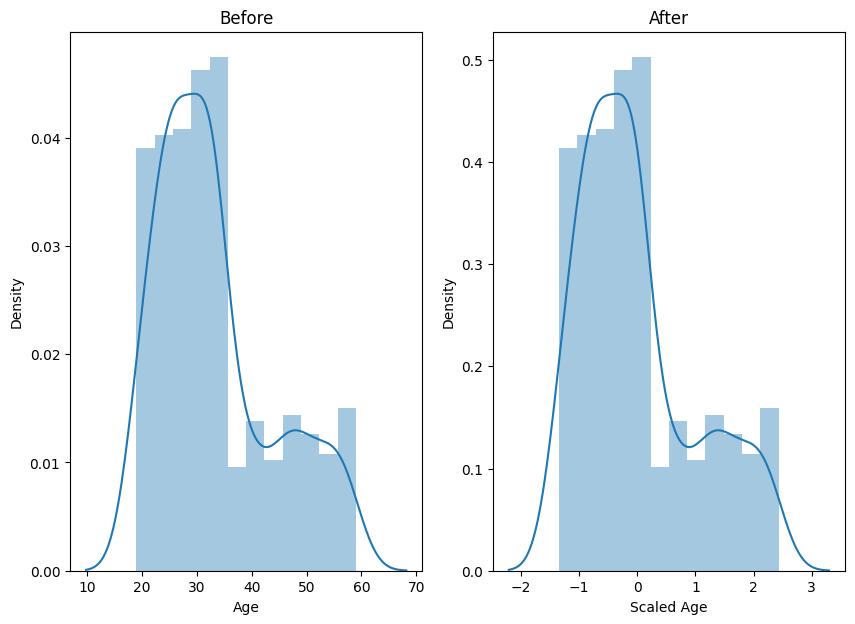

In [72]:
# For visualiztion
plt.figure(figsize=(10, 7))

# Previous data graph
plt.subplot(1, 2, 1)
plt.title("Before")
sns.distplot(dataset["Age"])

# Scaled data graph
plt.subplot(1, 2, 2)
plt.title("After")
sns.distplot(dataset["Scaled Age"])

# Display plot
plt.show()

#### Feature Scaling (Normalization)

In [73]:
dataset = pd.read_csv("../assets/csv-files/students.csv")
dataset.head(3)

,Roll No,Name,Gender,Age,Faculty,Level,Program,Year,Year of Study,GPA,Enrollment Status,Phone Number,Email
0,100000,Student0,F,24.0,Law,Graduate,LLB,2024.0,4.0,3.10,Online,977-9889833788,student100000@university.edu
1,100001,Student1,M,25.0,Management,Graduate,NaN,2022.0,4.0,2.77,Physical,977-9823190889,student100001@university.edu
2,100002,Student2,F,29.0,Engineering,Phd,Electrical,2022.0,2.0,2.67,NaN,977-9826760704,student100002@university.edu


In [74]:
dataset.isnull().sum()

Roll No                0
Name                   0
Gender                40
Age                   41
Faculty               54
Level                105
Program               99
Year                  51
Year of Study        105
GPA                   54
Enrollment Status     59
Phone Number          56
Email                 55
dtype: int64

In [75]:
dataset["Age"].fillna(dataset["Age"].mean(), inplace=True) # Filling up null values

C:\Users\kusha\AppData\Local\Temp\ipykernel_18908\313626740.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset["Age"].fillna(dataset["Age"].mean(), inplace=True) # Filling up null values


C:\Users\kusha\AppData\Local\Temp\ipykernel_18908\1666284269.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset["Age"])


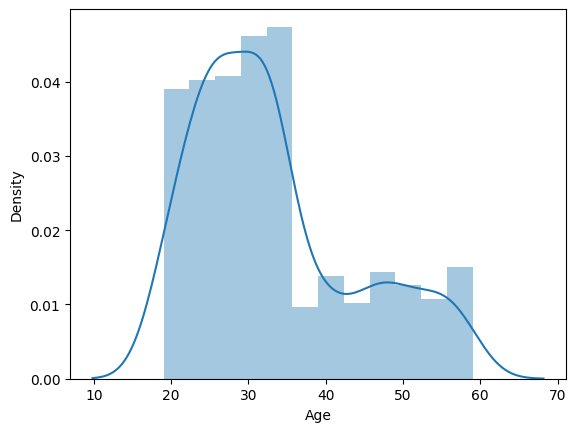

In [76]:
# See graphical nature
sns.distplot(dataset["Age"])
plt.show()

In [77]:
# Feature scaling (Normalization)
from sklearn.preprocessing import MinMaxScaler

In [78]:
mms = MinMaxScaler()
mms.fit(dataset[["Age"]]) # Works upon two dimension dataset
# The fit (data) method is used to compute the mean and std dev for a given feature to be used further for scaling.

MinMaxScaler()

In [79]:
dataset["Scaled Age"] = mms.transform(dataset[["Age"]]) # Works on two dimensional dataset
dataset.head(3)

,Roll No,Name,Gender,Age,Faculty,Level,Program,Year,Year of Study,GPA,Enrollment Status,Phone Number,Email,Scaled Age
0,100000,Student0,F,24.0,Law,Graduate,LLB,2024.0,4.0,3.10,Online,977-9889833788,student100000@university.edu,0.125
1,100001,Student1,M,25.0,Management,Graduate,NaN,2022.0,4.0,2.77,Physical,977-9823190889,student100001@university.edu,0.150
2,100002,Student2,F,29.0,Engineering,Phd,Electrical,2022.0,2.0,2.67,NaN,977-9826760704,student100002@university.edu,0.250


C:\Users\kusha\AppData\Local\Temp\ipykernel_18908\411481786.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset["Age"])
C:\Users\kusha\AppData\Local\Temp\ipykernel_18908\411481786.py:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset["Scaled Age"])


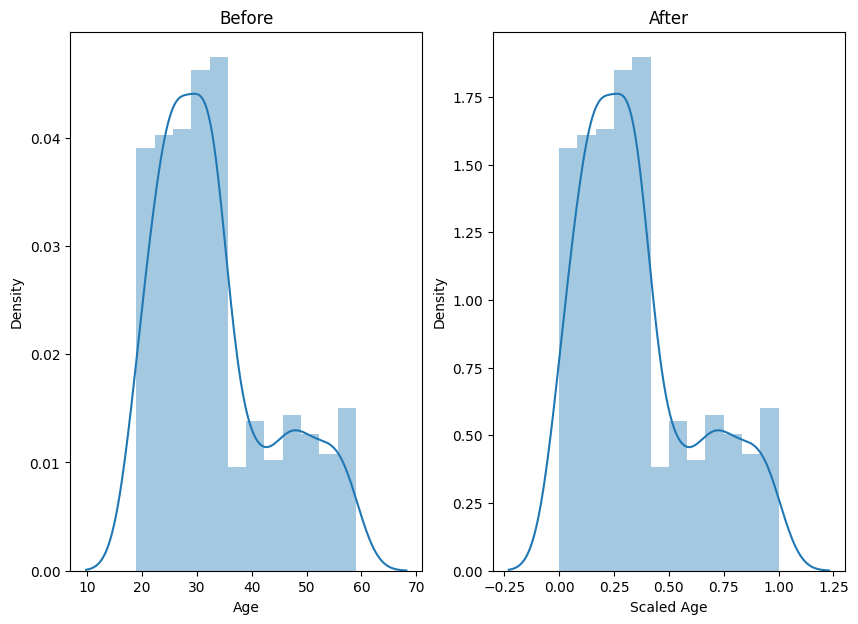

In [80]:
# For visualiztion
plt.figure(figsize=(10, 7))

# Previous data graph
plt.subplot(1, 2, 1)
plt.title("Before")
sns.distplot(dataset["Age"])

# Scaled data graph
plt.subplot(1, 2, 2)
plt.title("After")
sns.distplot(dataset["Scaled Age"])

# Show graph
plt.show()

## 4. Encoding Categorical Variables

#### One Hot Encoding and Dummy Varibles
- It is used when you have limited number of categorical data

In [81]:
import pandas as pd

In [82]:
dataset = pd.read_csv("../assets/csv-files/students.csv")
dataset.head() 

,Roll No,Name,Gender,Age,Faculty,Level,Program,Year,Year of Study,GPA,Enrollment Status,Phone Number,Email
0,100000,Student0,F,24.0,Law,Graduate,LLB,2024.0,4.0,3.10,Online,977-9889833788,student100000@university.edu
1,100001,Student1,M,25.0,Management,Graduate,NaN,2022.0,4.0,2.77,Physical,977-9823190889,student100001@university.edu
2,100002,Student2,F,29.0,Engineering,Phd,Electrical,2022.0,2.0,2.67,NaN,977-9826760704,student100002@university.edu
3,100003,Student3,F,53.0,Education,Phd,Nepali,2023.0,2.0,3.47,Physical,977-9858318769,NaN
4,100004,Student4,M,NaN,Engineering,Phd,Electrical,2024.0,2.0,3.11,Online,977-9850103564,student100004@university.edu


In [83]:
dataset.isnull().sum() # Check for missing values

Roll No                0
Name                   0
Gender                40
Age                   41
Faculty               54
Level                105
Program               99
Year                  51
Year of Study        105
GPA                   54
Enrollment Status     59
Phone Number          56
Email                 55
dtype: int64

In [84]:
 # Fill all the missing values with mode of the column which we want to encocde
dataset["Gender"].fillna(dataset["Gender"].mode()[0], inplace=True)
dataset["Enrollment Status"].fillna(dataset["Enrollment Status"].mode()[0], inplace=True)
# Now the data is ready for encoding

C:\Users\kusha\AppData\Local\Temp\ipykernel_18908\2275010252.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset["Gender"].fillna(dataset["Gender"].mode()[0], inplace=True)
C:\Users\kusha\AppData\Local\Temp\ipykernel_18908\2275010252.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves 

Using Pandas: get_dummies()

In [85]:
en_data = dataset[["Gender", "Enrollment Status"]] # Getting all the columns that needs to encode

In [86]:
encoded_data = pd.get_dummies(en_data) # Encoding our data (one hot encoding)
encoded_data

,Gender_F,Gender_M,Enrollment Status_Online,Enrollment Status_Physical
0,True,False,True,False
1,False,True,False,True
2,True,False,False,True
3,True,False,False,True
4,False,True,True,False
...,...,...,...,...
495,False,True,False,True
496,True,False,True,False
497,True,False,False,True
498,True,False,True,False


In [87]:
encoded_data.info() # After encoding we have our data in boolean form

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 4 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   Gender_F                    500 non-null    bool 
 1   Gender_M                    500 non-null    bool 
 2   Enrollment Status_Online    500 non-null    bool 
 3   Enrollment Status_Physical  500 non-null    bool 
dtypes: bool(4)
memory usage: 2.1 KB


In [88]:
# But we need data in numerical form
encoded_data.apply(lambda x: x.astype(int)) # Converts boolean data to numerical form

,Gender_F,Gender_M,Enrollment Status_Online,Enrollment Status_Physical
0,1,0,1,0
1,0,1,0,1
2,1,0,0,1
3,1,0,0,1
4,0,1,1,0
...,...,...,...,...
495,0,1,0,1
496,1,0,1,0
497,1,0,0,1
498,1,0,1,0


In [89]:
# Now convert it in Data Frame
numeric_data = encoded_data.apply(lambda x: x.astype(int))
pd.DataFrame(numeric_data, columns=numeric_data.columns)

,Gender_F,Gender_M,Enrollment Status_Online,Enrollment Status_Physical
0,1,0,1,0
1,0,1,0,1
2,1,0,0,1
3,1,0,0,1
4,0,1,1,0
...,...,...,...,...
495,0,1,0,1
496,1,0,1,0
497,1,0,0,1
498,1,0,1,0


Using scikit-learn: OneHotEncoder

In [90]:
from sklearn.preprocessing import OneHotEncoder

In [101]:
# Initialize the OneHotEncoder
ohe = OneHotEncoder()

# Fit the encoder to the data and transform it into a one-hot encoded sparse matrix.
# One-hot encoding converts categorical variables into a format that can be provided to ML algorithms.
# The result is a sparse matrix where most elements are 0 and only a few are 1, indicating the presence of a category.
ohe.fit_transform(en_data)

# ---------------- Explanation of fit, transform, and fit_transform ----------------
# .fit(data): Learns parameters from the data (e.g., categories for OneHotEncoder, or mean/std for scalers).
# .transform(data): Applies the learned transformation (e.g., encoding or scaling) to the data.
# .fit_transform(data): Combines both steps — fits the data and then transforms it in one go.

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 1000 stored elements and shape (500, 4)>

In [102]:
# To get the data in form of array
ohe.fit_transform(en_data).toarray()

array([[1., 0., 1., 0.],
       [0., 1., 0., 1.],
       [1., 0., 0., 1.],
       ...,
       [1., 0., 0., 1.],
       [1., 0., 1., 0.],
       [1., 0., 0., 1.]], shape=(500, 4))

In [93]:
# But we need it in the form of Data Frame
ar = ohe.fit_transform(en_data).toarray()
pd.DataFrame(ar, columns=encoded_data.columns)

,Gender_F,Gender_M,Enrollment Status_Online,Enrollment Status_Physical
0,1.0,0.0,1.0,0.0
1,0.0,1.0,0.0,1.0
2,1.0,0.0,0.0,1.0
3,1.0,0.0,0.0,1.0
4,0.0,1.0,1.0,0.0
...,...,...,...,...
495,0.0,1.0,0.0,1.0
496,1.0,0.0,1.0,0.0
497,1.0,0.0,0.0,1.0
498,1.0,0.0,1.0,0.0


In [94]:
# If your data is to large and want to drop the first column you can proceed as
ohe = OneHotEncoder(drop="first")
ar = ohe.fit_transform(en_data).toarray()
pd.DataFrame(ar, columns=[encoded_data.columns[1], encoded_data.columns[3]]) 
# Because first columns of both categorical data was removed i.e columns[0] and columns[2] are removed

,Gender_M,Enrollment Status_Physical
0,0.0,0.0
1,1.0,1.0
2,0.0,1.0
3,0.0,1.0
4,1.0,0.0
...,...,...
495,1.0,1.0
496,0.0,0.0
497,0.0,1.0
498,0.0,0.0


#### Label Encoding
- It is performed on nominal data (data having no order sequence i.e. has no connections)

In [95]:
import pandas as pd

In [96]:
df = pd.DataFrame({"Name" : ["Mukesh", "Nikesh", "Ashok", "Sandip", "Subha"]})
df

,Name
0,Mukesh
1,Nikesh
2,Ashok
3,Sandip
4,Subha


In [97]:
from sklearn.preprocessing import LabelEncoder

In [98]:
le = LabelEncoder()
le.fit_transform(df["Name"]) # The fit_transform () method does both fits and transform.

array([1, 2, 0, 3, 4])

In [99]:
# If we need to add the encoded data column to our Data Frame
df["Encoded Name"] = le.fit_transform(df["Name"])
df

,Name,Encoded Name
0,Mukesh,1
1,Nikesh,2
2,Ashok,0
3,Sandip,3
4,Subha,4


Take some real world data and apply concept of label encoding

In [103]:
dataset = pd.read_csv("../assets/csv-files/students.csv")
dataset.head(3)

,Roll No,Name,Gender,Age,Faculty,Level,Program,Year,Year of Study,GPA,Enrollment Status,Phone Number,Email
0,100000,Student0,F,24.0,Law,Graduate,LLB,2024.0,4.0,3.10,Online,977-9889833788,student100000@university.edu
1,100001,Student1,M,25.0,Management,Graduate,NaN,2022.0,4.0,2.77,Physical,977-9823190889,student100001@university.edu
2,100002,Student2,F,29.0,Engineering,Phd,Electrical,2022.0,2.0,2.67,NaN,977-9826760704,student100002@university.edu


In [105]:
label_enc = LabelEncoder()
label_enc.fit(dataset["Faculty"])
# .fit(data): Learns parameters from the data (e.g., categories for OneHotEncoder, or mean/std for scalers).

LabelEncoder()

In [106]:
label_enc.transform(dataset["Faculty"])
# .transform(data): Applies the learned transformation (e.g., encoding or scaling) to the data.d.

array([2, 3, 1, 0, 1, 2, 0, 0, 3, 4, 4, 2, 1, 3, 3, 4, 4, 1, 1, 1, 1, 4,
       3, 1, 4, 3, 0, 2, 2, 4, 4, 3, 2, 1, 0, 2, 1, 4, 0, 2, 4, 2, 2, 1,
       3, 1, 1, 2, 2, 4, 3, 0, 4, 2, 0, 1, 3, 1, 1, 1, 3, 0, 2, 2, 2, 3,
       0, 2, 1, 4, 1, 1, 0, 3, 2, 3, 0, 2, 3, 3, 1, 2, 3, 1, 1, 3, 3, 0,
       3, 2, 3, 4, 4, 2, 0, 1, 0, 1, 1, 0, 0, 0, 4, 2, 0, 1, 1, 0, 0, 0,
       3, 4, 0, 2, 0, 4, 2, 1, 1, 1, 3, 0, 3, 2, 0, 1, 2, 0, 3, 1, 4, 1,
       1, 3, 1, 3, 0, 3, 0, 4, 3, 3, 3, 0, 3, 0, 0, 1, 2, 2, 4, 0, 2, 2,
       2, 0, 2, 2, 3, 1, 0, 0, 1, 2, 2, 3, 2, 1, 1, 0, 2, 0, 4, 4, 3, 0,
       1, 2, 3, 1, 3, 3, 0, 2, 0, 3, 4, 0, 1, 2, 2, 1, 3, 2, 2, 1, 3, 1,
       1, 4, 3, 2, 0, 1, 1, 1, 2, 2, 0, 0, 0, 3, 3, 4, 2, 3, 2, 1, 4, 4,
       1, 2, 0, 0, 2, 0, 3, 2, 1, 0, 4, 2, 3, 2, 4, 2, 0, 3, 2, 1, 3, 1,
       0, 0, 0, 2, 4, 0, 3, 1, 0, 1, 0, 1, 4, 2, 4, 0, 1, 2, 3, 1, 3, 0,
       0, 1, 3, 3, 3, 2, 4, 0, 0, 2, 3, 0, 0, 2, 0, 3, 0, 1, 1, 1, 3, 3,
       1, 0, 1, 3, 3, 1, 4, 4, 0, 1, 3, 1, 1, 3, 1,

In [107]:
# If you want to replace the data with encoded data
dataset["Faculty"] = label_enc.transform(dataset["Faculty"])
dataset

,Roll No,Name,Gender,Age,Faculty,Level,Program,Year,Year of Study,GPA,Enrollment Status,Phone Number,Email
0,100000,Student0,F,24.0,2,Graduate,LLB,2024.0,4.0,3.10,Online,977-9889833788,student100000@university.edu
1,100001,Student1,M,25.0,3,Graduate,NaN,2022.0,4.0,2.77,Physical,977-9823190889,student100001@university.edu
2,100002,Student2,F,29.0,1,Phd,Electrical,2022.0,2.0,2.67,NaN,977-9826760704,student100002@university.edu
3,100003,Student3,F,53.0,0,Phd,Nepali,2023.0,2.0,3.47,Physical,977-9858318769,NaN
4,100004,Student4,M,NaN,1,Phd,Electrical,2024.0,2.0,3.11,Online,977-9850103564,student100004@university.edu
...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,100495,Student495,M,47.0,4,NaN,NaN,2024.0,NaN,3.28,Physical,977-9804020202,NaN
496,100496,Student496,F,51.0,3,Phd,NaN,2020.0,2.0,3.49,Online,977-9858513630,student100496@university.edu
497,100497,Student497,F,27.0,1,Phd,Electronic and Communication,2023.0,2.0,NaN,Physical,977-9817818164,student100497@university.edu
498,100498,Student498,F,29.0,4,NaN,NaN,2022.0,NaN,3.20,Online,977-9891195410,student100498@university.edu


#### Ordinal Encoding
- It is performed on ordinal data (data having order sequence i.e. has connections)

 With Scikit-learn

In [108]:
import pandas as pd

In [109]:
df = pd.DataFrame({"Size" : ["s", "l", "xl", "m", "l", "s", "xl", "m", "s", "xl", "l"]})
df.head(5)

,Size
0,s
1,l
2,xl
3,m
4,l


In [110]:
data_order = [["s", "m", "l", "xl"]] # Two dimensional list for order of data

In [111]:
from sklearn.preprocessing import OrdinalEncoder

In [112]:
oe = OrdinalEncoder(categories=data_order)
oe.fit(df[["Size"]])
# .fit(data): Learns parameters from the data (e.g., categories for OneHotEncoder, or mean/std for scalers).

OrdinalEncoder(categories=[['s', 'm', 'l', 'xl']])

In [113]:
oe.transform(df[["Size"]])
# .transform(data): Applies the learned transformation (e.g., encoding or scaling) to the data.

array([[0.],
       [2.],
       [3.],
       [1.],
       [2.],
       [0.],
       [3.],
       [1.],
       [0.],
       [3.],
       [2.]])

In [114]:
# If we want to add Encoded data to Data Frame
df["Encoded With Scikit-learn"] = oe.transform(df[["Size"]])
df

,Size,Encoded With Scikit-learn
0,s,0.0
1,l,2.0
2,xl,3.0
3,m,1.0
4,l,2.0
5,s,0.0
6,xl,3.0
7,m,1.0
8,s,0.0
9,xl,3.0


 With Map Function

In [115]:
data_order = {"s" : 0, "m" : 1, "l" : 2, "xl" : 3} # You can decide the numbers accordingly

In [116]:
df["Size"].map(data_order) # Ordinal encoding using map()

0     0
1     2
2     3
3     1
4     2
5     0
6     3
7     1
8     0
9     3
10    2
Name: Size, dtype: int64

In [117]:
# If you want to save the encoded data to Data Frame
df["Encoded With Map Function"] = df["Size"].map(data_order)
df

,Size,Encoded With Scikit-learn,Encoded With Map Function
0,s,0.0,0
1,l,2.0,2
2,xl,3.0,3
3,m,1.0,1
4,l,2.0,2
5,s,0.0,0
6,xl,3.0,3
7,m,1.0,1
8,s,0.0,0
9,xl,3.0,3


Performing Ordinal Encoding in large dataset

In [118]:
dataset = pd.read_csv("../assets/csv-files/students.csv")
dataset.head(4)

,Roll No,Name,Gender,Age,Faculty,Level,Program,Year,Year of Study,GPA,Enrollment Status,Phone Number,Email
0,100000,Student0,F,24.0,Law,Graduate,LLB,2024.0,4.0,3.10,Online,977-9889833788,student100000@university.edu
1,100001,Student1,M,25.0,Management,Graduate,NaN,2022.0,4.0,2.77,Physical,977-9823190889,student100001@university.edu
2,100002,Student2,F,29.0,Engineering,Phd,Electrical,2022.0,2.0,2.67,NaN,977-9826760704,student100002@university.edu
3,100003,Student3,F,53.0,Education,Phd,Nepali,2023.0,2.0,3.47,Physical,977-9858318769,NaN


In [119]:
dataset["Level"].isnull().sum() # Checking for null values in Level column

np.int64(105)

In [120]:
dataset["Level"].fillna(dataset["Level"].mode()[0], inplace=True) # Filling up null values

C:\Users\kusha\AppData\Local\Temp\ipykernel_18908\3020749447.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset["Level"].fillna(dataset["Level"].mode()[0], inplace=True) # Filling up null values


In [121]:
dataset["Level"].unique() # Returns all the unique values present in column

array(['Graduate', 'Phd', 'Post Graduate'], dtype=object)

In [122]:
encode_data_order = [["Graduate", "Post Graduate", "Phd"]] # Order of encoding

In [123]:
from sklearn.preprocessing import OrdinalEncoder

In [124]:
ordinal_encoder = OrdinalEncoder(categories=encode_data_order)
dataset["Level"] = ordinal_encoder.fit_transform(dataset[["Level"]])
dataset.head(5)

,Roll No,Name,Gender,Age,Faculty,Level,Program,Year,Year of Study,GPA,Enrollment Status,Phone Number,Email
0,100000,Student0,F,24.0,Law,0.0,LLB,2024.0,4.0,3.10,Online,977-9889833788,student100000@university.edu
1,100001,Student1,M,25.0,Management,0.0,NaN,2022.0,4.0,2.77,Physical,977-9823190889,student100001@university.edu
2,100002,Student2,F,29.0,Engineering,2.0,Electrical,2022.0,2.0,2.67,NaN,977-9826760704,student100002@university.edu
3,100003,Student3,F,53.0,Education,2.0,Nepali,2023.0,2.0,3.47,Physical,977-9858318769,NaN
4,100004,Student4,M,NaN,Engineering,2.0,Electrical,2024.0,2.0,3.11,Online,977-9850103564,student100004@university.edu


## 5. Handling Duplicates
- Content is called duplicate iff two rows are exactly same
- Having same data in some columns don't mean it is duplicate

In [125]:
import pandas as pd

In [126]:
data = {
    "Name": ["Mukesh", "Nikesh", "Binod", "Ashok", "Subha", "Nikesh", "Subham"],
    "Physics": [56, 67, 87, 45, 33, 67, 34],
    "Chemistry": [56, 64, 34, 56, 45, 64, 89],
    "Biology": [64, 67, 76, 45, 56, 67, 32],
}
df = pd.DataFrame(data)
df

,Name,Physics,Chemistry,Biology
0,Mukesh,56,56,64
1,Nikesh,67,64,67
2,Binod,87,34,76
3,Ashok,45,56,45
4,Subha,33,45,56
5,Nikesh,67,64,67
6,Subham,34,89,32


In [127]:
df.duplicated() # Returns the duplicated rows

0    False
1    False
2    False
3    False
4    False
5     True
6    False
dtype: bool

In [128]:
df["Duplicated"] = df.duplicated() # Adding duplicated data in Data Frame
df

,Name,Physics,Chemistry,Biology,Duplicated
0,Mukesh,56,56,64,False
1,Nikesh,67,64,67,False
2,Binod,87,34,76,False
3,Ashok,45,56,45,False
4,Subha,33,45,56,False
5,Nikesh,67,64,67,True
6,Subham,34,89,32,False


In [129]:
# Remove the Duplicated column which we have added
df.drop("Duplicated", axis=1, inplace=True)
df

,Name,Physics,Chemistry,Biology
0,Mukesh,56,56,64
1,Nikesh,67,64,67
2,Binod,87,34,76
3,Ashok,45,56,45
4,Subha,33,45,56
5,Nikesh,67,64,67
6,Subham,34,89,32


In [130]:
df.drop_duplicates(keep="first", inplace=True)
df

,Name,Physics,Chemistry,Biology
0,Mukesh,56,56,64
1,Nikesh,67,64,67
2,Binod,87,34,76
3,Ashok,45,56,45
4,Subha,33,45,56
6,Subham,34,89,32


## 6. Dealing With Inconsistent Data

#### Replace and Data Type Change

In [131]:
import pandas as pd

In [132]:
dataset = pd.read_csv("../assets/csv-files/students.csv")
dataset.head(3)

,Roll No,Name,Gender,Age,Faculty,Level,Program,Year,Year of Study,GPA,Enrollment Status,Phone Number,Email
0,100000,Student0,F,24.0,Law,Graduate,LLB,2024.0,4.0,3.10,Online,977-9889833788,student100000@university.edu
1,100001,Student1,M,25.0,Management,Graduate,NaN,2022.0,4.0,2.77,Physical,977-9823190889,student100001@university.edu
2,100002,Student2,F,29.0,Engineering,Phd,Electrical,2022.0,2.0,2.67,NaN,977-9826760704,student100002@university.edu


In [133]:
dataset.info() # Get info about dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Roll No            500 non-null    int64  
 1   Name               500 non-null    object 
 2   Gender             460 non-null    object 
 3   Age                459 non-null    float64
 4   Faculty            446 non-null    object 
 5   Level              395 non-null    object 
 6   Program            401 non-null    object 
 7   Year               449 non-null    float64
 8   Year of Study      395 non-null    float64
 9   GPA                446 non-null    float64
 10  Enrollment Status  441 non-null    object 
 11  Phone Number       444 non-null    object 
 12  Email              445 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 50.9+ KB


In [134]:
dataset.isnull().sum() # Get the null values

Roll No                0
Name                   0
Gender                40
Age                   41
Faculty               54
Level                105
Program               99
Year                  51
Year of Study        105
GPA                   54
Enrollment Status     59
Phone Number          56
Email                 55
dtype: int64

In [135]:
# Fill null values in Phone Number column
dataset["Phone Number"].fillna(dataset["Phone Number"].mode()[0], inplace=True)

C:\Users\kusha\AppData\Local\Temp\ipykernel_18908\181973232.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset["Phone Number"].fillna(dataset["Phone Number"].mode()[0], inplace=True)


In [136]:
dataset["Phone Number"].value_counts()

Phone Number
977-9800178191    57
977-9826760704     1
977-9858318769     1
977-9850103564     1
977-9852137586     1
                  ..
977-9882915063     1
977-9860298846     1
977-9898222611     1
977-9848135936     1
977-9823190889     1
Name: count, Length: 444, dtype: int64

In [137]:
# Lets convert the data into the numerical data i.e. remove - sign
dataset["Phone Number"] = dataset["Phone Number"].str.replace("-", "")
dataset.head(5)

,Roll No,Name,Gender,Age,Faculty,Level,Program,Year,Year of Study,GPA,Enrollment Status,Phone Number,Email
0,100000,Student0,F,24.0,Law,Graduate,LLB,2024.0,4.0,3.10,Online,9779889833788,student100000@university.edu
1,100001,Student1,M,25.0,Management,Graduate,NaN,2022.0,4.0,2.77,Physical,9779823190889,student100001@university.edu
2,100002,Student2,F,29.0,Engineering,Phd,Electrical,2022.0,2.0,2.67,NaN,9779826760704,student100002@university.edu
3,100003,Student3,F,53.0,Education,Phd,Nepali,2023.0,2.0,3.47,Physical,9779858318769,NaN
4,100004,Student4,M,NaN,Engineering,Phd,Electrical,2024.0,2.0,3.11,Online,9779850103564,student100004@university.edu


In [138]:
# Convert the data into numerical datatype
dataset["Phone Number"] = dataset["Phone Number"].astype("int64")
dataset.head(5)

,Roll No,Name,Gender,Age,Faculty,Level,Program,Year,Year of Study,GPA,Enrollment Status,Phone Number,Email
0,100000,Student0,F,24.0,Law,Graduate,LLB,2024.0,4.0,3.10,Online,9779889833788,student100000@university.edu
1,100001,Student1,M,25.0,Management,Graduate,NaN,2022.0,4.0,2.77,Physical,9779823190889,student100001@university.edu
2,100002,Student2,F,29.0,Engineering,Phd,Electrical,2022.0,2.0,2.67,NaN,9779826760704,student100002@university.edu
3,100003,Student3,F,53.0,Education,Phd,Nepali,2023.0,2.0,3.47,Physical,9779858318769,NaN
4,100004,Student4,M,NaN,Engineering,Phd,Electrical,2024.0,2.0,3.11,Online,9779850103564,student100004@university.edu


In [139]:
dataset.info() # You will see the change in datatype

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Roll No            500 non-null    int64  
 1   Name               500 non-null    object 
 2   Gender             460 non-null    object 
 3   Age                459 non-null    float64
 4   Faculty            446 non-null    object 
 5   Level              395 non-null    object 
 6   Program            401 non-null    object 
 7   Year               449 non-null    float64
 8   Year of Study      395 non-null    float64
 9   GPA                446 non-null    float64
 10  Enrollment Status  441 non-null    object 
 11  Phone Number       500 non-null    int64  
 12  Email              445 non-null    object 
dtypes: float64(4), int64(2), object(7)
memory usage: 50.9+ KB
